Comentarios:

In [65]:
# EDA Básico - Empleados
# Proyecto: curso_python
# Objetivo: exploración inicial de un dataset realista


importacion de librerias

In [66]:
import pandas as pd
import numpy as np


Leer csv o dataset
head() sirve para ver rápidamente las primeras filas del DataFrame

In [67]:
df = pd.read_csv("../data/empleados.csv")
df.head()


,id,edad,ingreso,departamento,antiguedad
0,1,25,32000.0,IT,2
1,2,45,58000.0,Ventas,10
2,3,31,41000.0,Marketing,4
3,4,29,39000.0,IT,3
4,5,50,62000.0,HR,15


Qué hace df.info()

Muestra, para cada columna:
Nombre de la columna
Cantidad de valores NO nulos
Tipo de dato (int64, float64, object, etc.)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10 non-null     int64  
 1   edad          10 non-null     int64  
 2   ingreso       9 non-null      float64
 3   departamento  10 non-null     object 
 4   antiguedad    10 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


describe() te da un resumen estadístico rápido de tus datos numéricos.
Sirve para entender el dataset en segundos, sin calcular nada a mano.
¿Qué información devuelve?

Para columnas numéricas, muestra:

Métrica     Qué significa	                  Para qué sirve
count	    Cantidad de valores NO nulos        Detectar datos faltantes
mean	    Promedio	                        Nivel típico
std	        Desviación estándar	                Variabilidad
min	        Valor mínimo	                    Detectar errores/outliers
25%	        Primer cuartil	                    Distribución
50%	        Mediana                         	Valor central real
75%	        Tercer cuartil	                    Distribución
max	        Valor máximo	                    Detectar outliers

In [69]:
df.describe()


,id,edad,ingreso,antiguedad
count,10.00000,10.000000,9.000000,10.000000
mean,5.50000,36.900000,47444.444444,6.900000
std,3.02765,9.024042,11248.456684,4.483302
min,1.00000,25.000000,32000.000000,2.000000
25%,3.25000,29.500000,39000.000000,3.250000
50%,5.50000,36.000000,45000.000000,6.000000
75%,7.75000,44.250000,58000.000000,9.750000
max,10.00000,50.000000,62000.000000,15.000000


df.boxplot() 
Detectar errores de carga
✔ Ver si una variable está muy dispersa
✔ Decidir si hay que:

eliminar outliers

transformarlos

dejarlos porque son reales

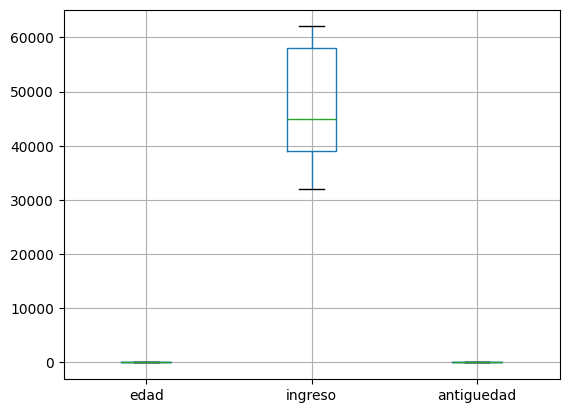

In [70]:
import matplotlib.pyplot as plt
plt.clf()

df[['edad', 'ingreso', 'antiguedad']].dropna().boxplot()
plt.show()



In [71]:
df.plot.scatter(x='antiguedad', y='ingreso')


<Axes: xlabel='antiguedad', ylabel='ingreso'>

df.isna().sum() 
es la forma directa y clara de contar los valores faltantes.

In [72]:
df.isna().sum()


id              0
edad            0
ingreso         1
departamento    0
antiguedad      0
dtype: int64

In [73]:
#llenar valor faltante con mediana
df['ingreso'].fillna(df['ingreso'].median(), inplace=True)


C:\Users\analu\AppData\Local\Temp\ipykernel_2560\2981427065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ingreso'].fillna(df['ingreso'].median(), inplace=True)


In [74]:
#sin valores faltantes
df.isna().sum()

id              0
edad            0
ingreso         0
departamento    0
antiguedad      0
dtype: int64

Deteccion de valores unicos y categgorias

In [75]:
df.nunique()


id              10
edad            10
ingreso          9
departamento     4
antiguedad       9
dtype: int64

Detecta columnas categóricas “disfrazadas” de números.

In [76]:
df['departamento'].value_counts()


departamento
IT           3
Ventas       3
Marketing    2
HR           2
Name: count, dtype: int64

Promedios por departamento

In [77]:
df.groupby('departamento')[['edad', 'ingreso', 'antiguedad']].mean()


,edad,ingreso,antiguedad
departamento,,,
HR,49.0,61000.000000,13.500000
IT,32.0,41666.666667,4.666667
Marketing,29.0,38500.000000,3.000000
Ventas,39.0,49333.333333,7.333333


In [78]:
df.boxplot(column='ingreso', by='departamento')


<Axes: title={'center': 'ingreso'}, xlabel='departamento'>

Correlaciones entre columnas


In [79]:
df[['edad', 'ingreso', 'antiguedad']].corr()


,edad,ingreso,antiguedad
edad,1.000000,0.990277,0.985671
ingreso,0.990277,1.000000,0.970050
antiguedad,0.985671,0.970050,1.000000


In [80]:
df.plot.scatter(x='antiguedad', y='ingreso')


<Axes: xlabel='antiguedad', ylabel='ingreso'>

¿Quién tiene el ingreso máximo?

In [81]:
df.loc[df['ingreso'].idxmax()]


id                    5
edad                 50
ingreso         62000.0
departamento         HR
antiguedad           15
Name: 4, dtype: object

¿Edad promedio por departamento?

In [82]:
df.groupby('departamento')['edad'].mean()


departamento
HR           49.0
IT           32.0
Marketing    29.0
Ventas       39.0
Name: edad, dtype: float64

¿Top 3 ingresos?

In [83]:
df.nlargest(3, 'ingreso')


,id,edad,ingreso,departamento,antiguedad
4,5,50,62000.0,HR,15
9,10,48,60000.0,HR,12
1,2,45,58000.0,Ventas,10


In [84]:
df.to_csv('resultado_limpio.csv', index=False)
